# Brain growth data

In [2]:
library(nlme)

## Load brain growth data

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	109 obs. of  4 variables:
 $ Age      : num  384 479 563 661 733 ...
 $ ICV      : num  654 810 899 997 1024 ...
 $ Sex      : chr  "Female" "Female" "Female" "Female" ...
 $ SubjectID: Ord.factor w/ 16 levels "S1507"<"S1468"<..: 5 5 5 5 5 5 5 5 5 2 ...
 - attr(*, "formula")=Class 'formula'  language ICV ~ Age | SubjectID
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
 - attr(*, "FUN")=function (x)  
 - attr(*, "order.groups")= logi TRUE


      Age              ICV             Sex              SubjectID 
 Min.   : 278.0   Min.   : 511.9   Length:109         S1460  : 9  
 1st Qu.: 558.0   1st Qu.: 981.2   Class :character   S1468  : 8  
 Median : 739.0   Median :1107.5   Mode  :character   S1502  : 8  
 Mean   : 861.2   Mean   :1089.7                      S1508  : 8  
 3rd Qu.:1037.0   3rd Qu.:1230.0                      S1555  : 8  
 Max.   :1809.0   Max.   :1513.8                      S1510  : 8  
                                                      (Other):60  

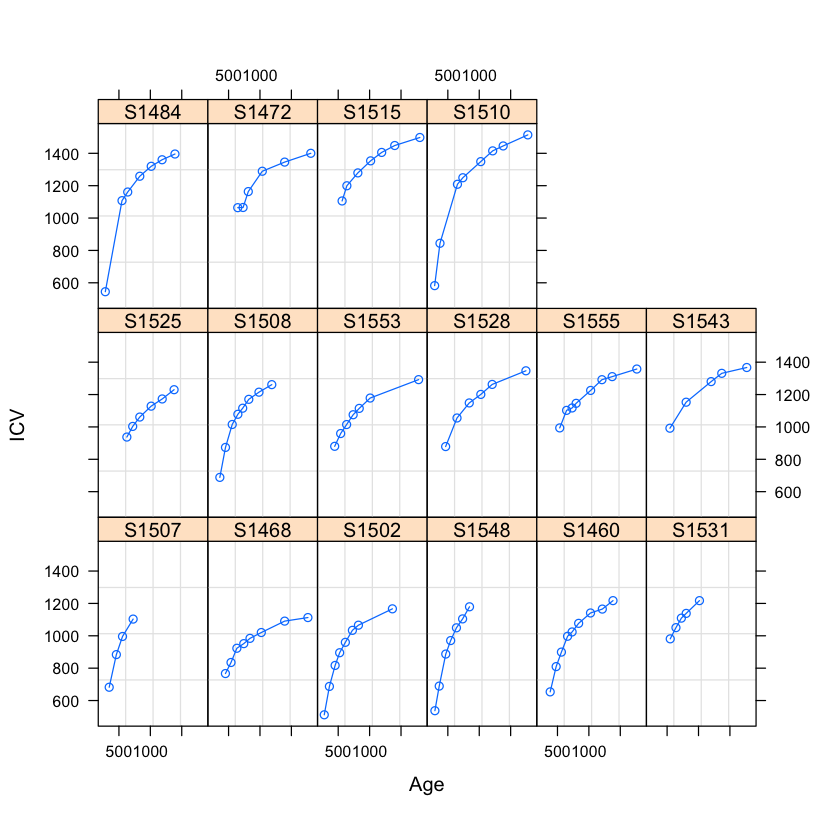

In [63]:
# Load data
brain <- read.csv(file="dyn.csv",head=TRUE,sep=",",stringsAsFactors=F)

# Scale ICV to cm3
brain['ICV'] = brain['ICV']/1000.0

# Group (if using nlme)
brain <- groupedData(ICV ~ Age | SubjectID, data=brain)

# Convert postnatal age to postgestational age by adding 270 days
brain$Age = brain$Age+270

# Remove subject S1437
brain<-brain[!brain$SubjectID=="S1437",]

# Data viz
plot(brain) # if using nlme
str(brain)
summary(brain)

## Fit SSlogis model

Nonlinear regression model
  model: ICV ~ SSlogis(Age, Asym, xmid, scal)
   data: brain
  Asym   xmid   scal 
1321.6  322.1  249.9 
 residual sum-of-squares: 836975

Number of iterations to convergence: 5 
Achieved convergence tolerance: 2.565e-06


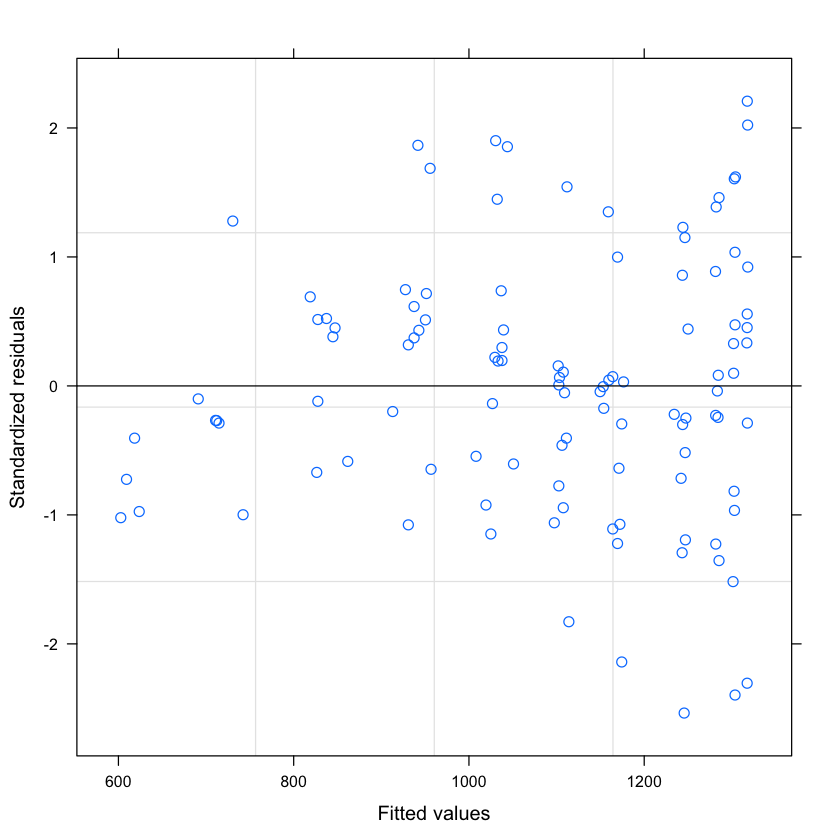

Call:
  Model: ICV ~ SSlogis(Age, Asym, xmid, scal) | SubjectID 
   Data: brain 

Coefficients:
          Asym     xmid     scal
S1507 1155.023 292.3037 142.6716
S1468 1112.391 186.0706 314.4123
S1502 1148.071 300.0475 183.1440
S1548 1192.687 318.5530 150.8415
S1460 1199.148 331.7953 218.0393
S1531 1291.256 220.9434 285.0128
S1525 1300.930 217.6454 421.1213
S1508 1249.478 313.8941 178.3878
S1553 1309.409 164.0089 380.7222
S1528 1358.850 224.2577 369.5132
S1555 1385.416 107.8125 433.7348
S1543 1395.399 173.5915 410.0326
S1484 1358.857 341.4853 159.3375
S1472 1414.361 292.1832 345.0734
S1515 1518.309 126.5203 414.4400
S1510 1455.779 341.7605 209.4109

Degrees of freedom: 109 total; 61 residual
Residual standard error: 24.48629


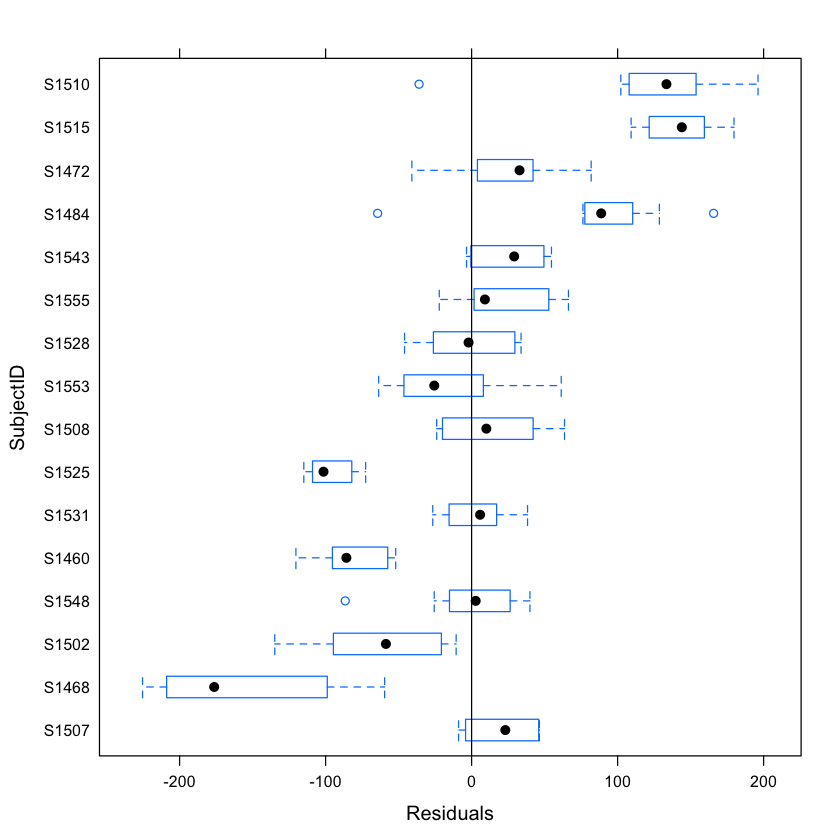

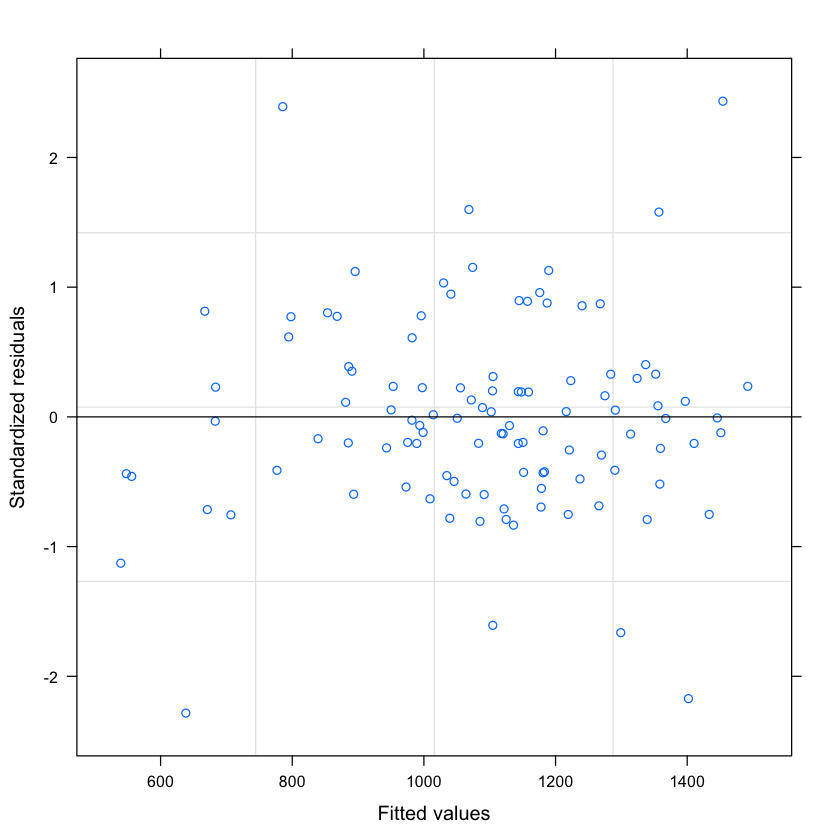

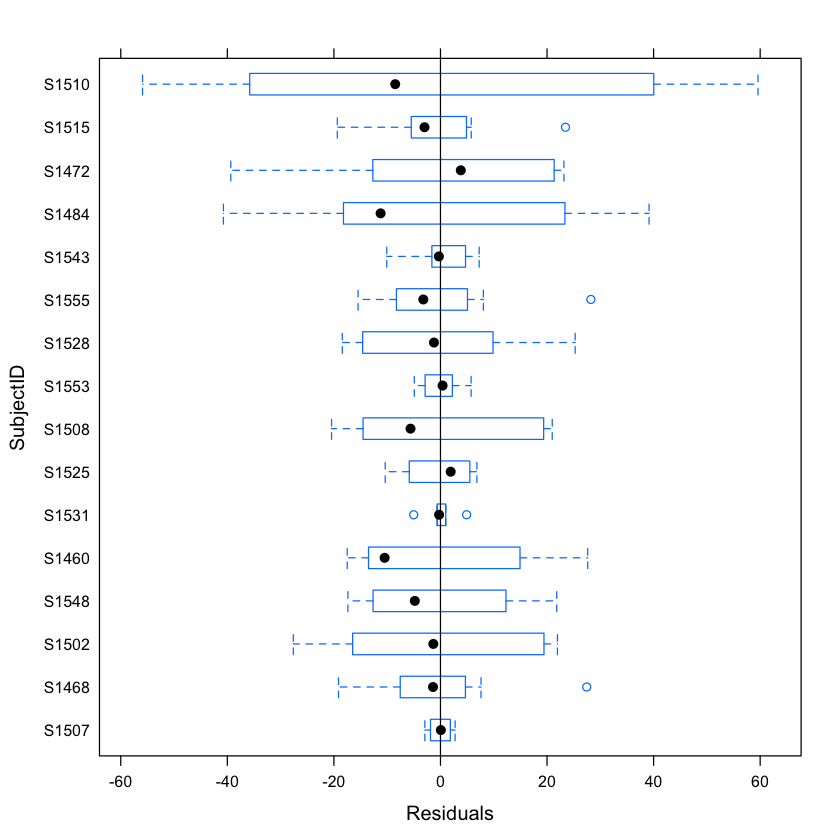

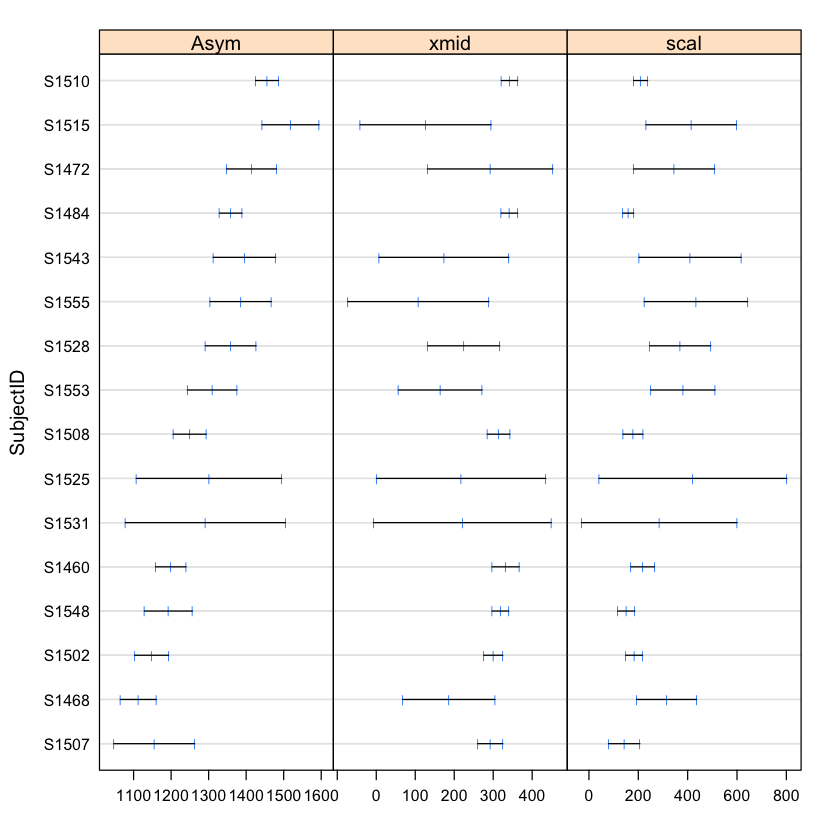

Nonlinear mixed-effects model fit by maximum likelihood
  Model: ICV ~ SSlogis(Age, Asym, xmid, scal) 
  Data: brain 
  Log-likelihood: -557.6455
  Fixed: list(Asym ~ 1, xmid ~ 1, scal ~ 1) 
     Asym      xmid      scal 
1301.0607  269.2263  264.8026 

Random effects:
 Formula: list(Asym ~ 1, xmid ~ 1, scal ~ 1)
 Level: SubjectID
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev    Corr         
Asym     103.16768 Asym   xmid  
xmid      55.18476 -0.182       
scal      80.82192  0.369 -0.953
Residual  25.09038              

Number of Observations: 109
Number of Groups: 16 


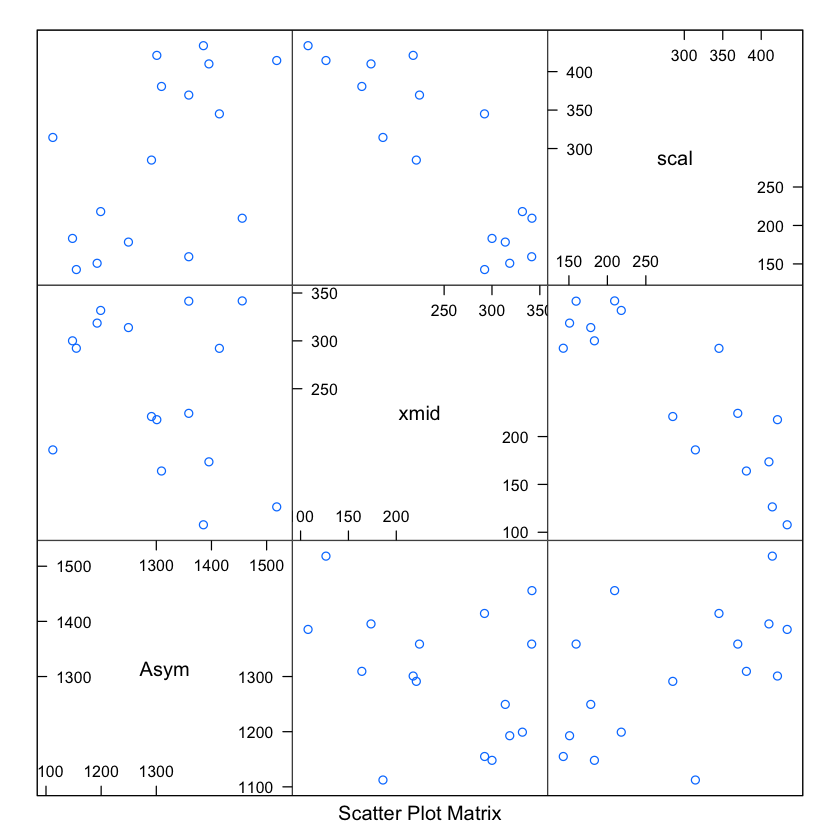

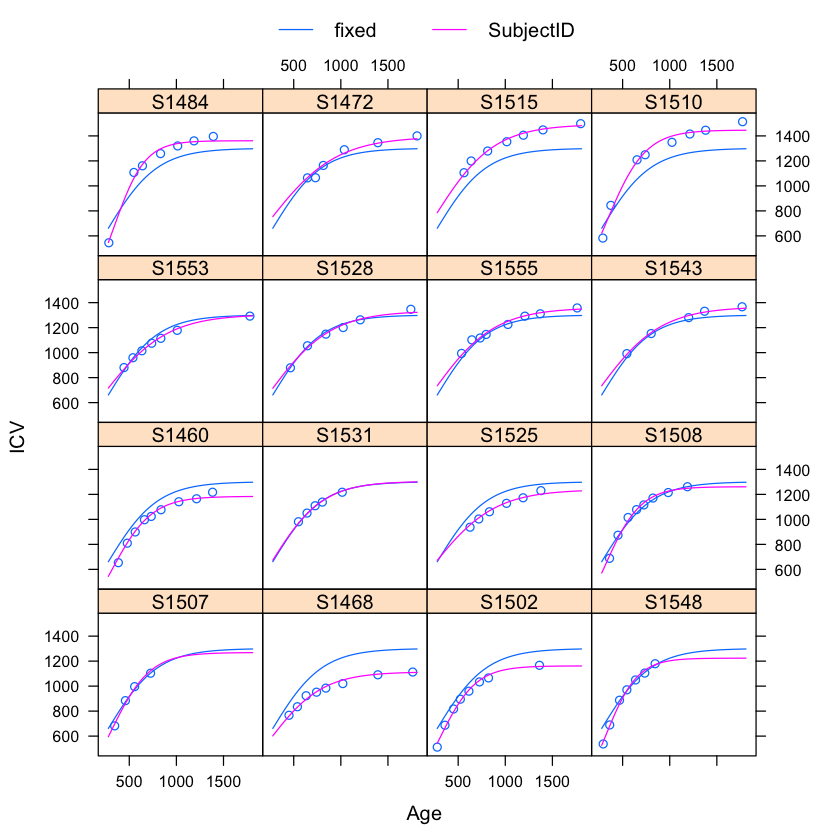

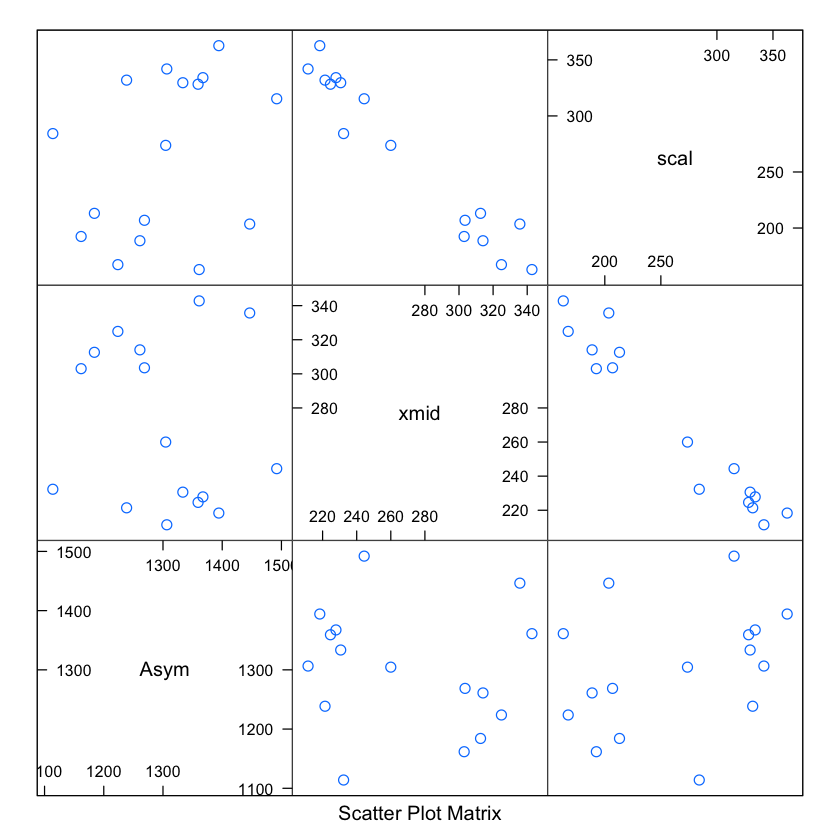

Nonlinear mixed-effects model fit by maximum likelihood
  Model: ICV ~ SSlogis(Age, Asym, xmid, scal) 
  Data: brain 
  Log-likelihood: -568.8457
  Fixed: list(Asym ~ 1, xmid ~ 1, scal ~ 1) 
     Asym      xmid      scal 
1289.6735  307.6705  227.3220 

Random effects:
 Formula: list(Asym ~ 1, xmid ~ 1, scal ~ 1)
 Level: SubjectID
 Structure: Diagonal
            Asym     xmid   scal Residual
StdDev: 95.45217 21.48289 38.555  29.2289

Number of Observations: 109
Number of Groups: 16 


Model df      AIC      BIC    logLik   Test  L.Ratio p-value
res3       1 10 1135.291 1162.205 -557.6455                        
res3_1     2  7 1151.691 1170.531 -568.8457 1 vs 2 22.40028   1e-04

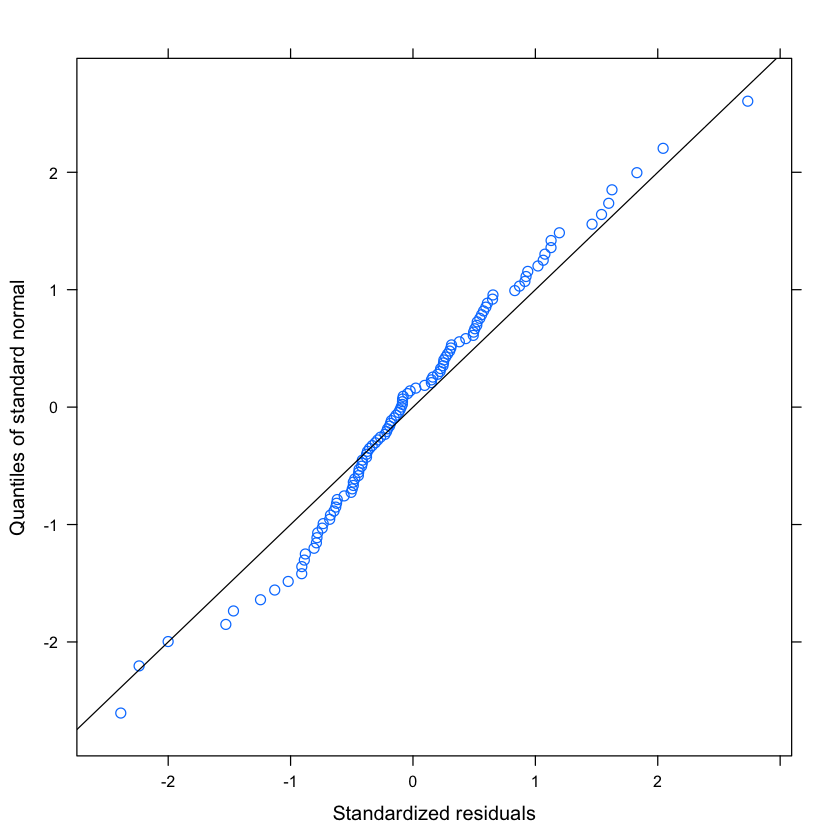

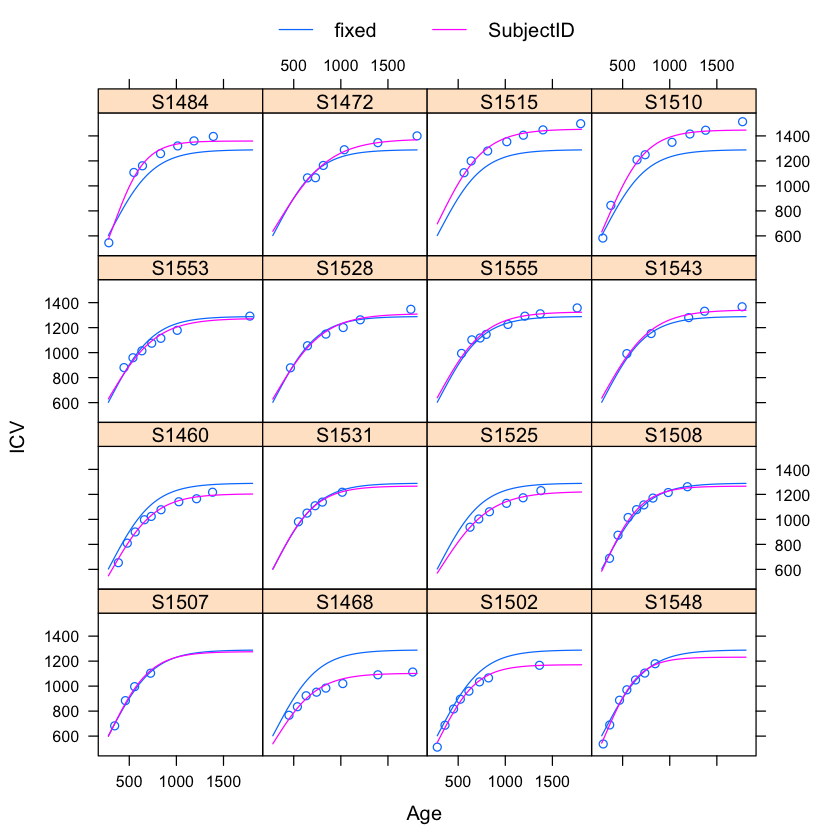

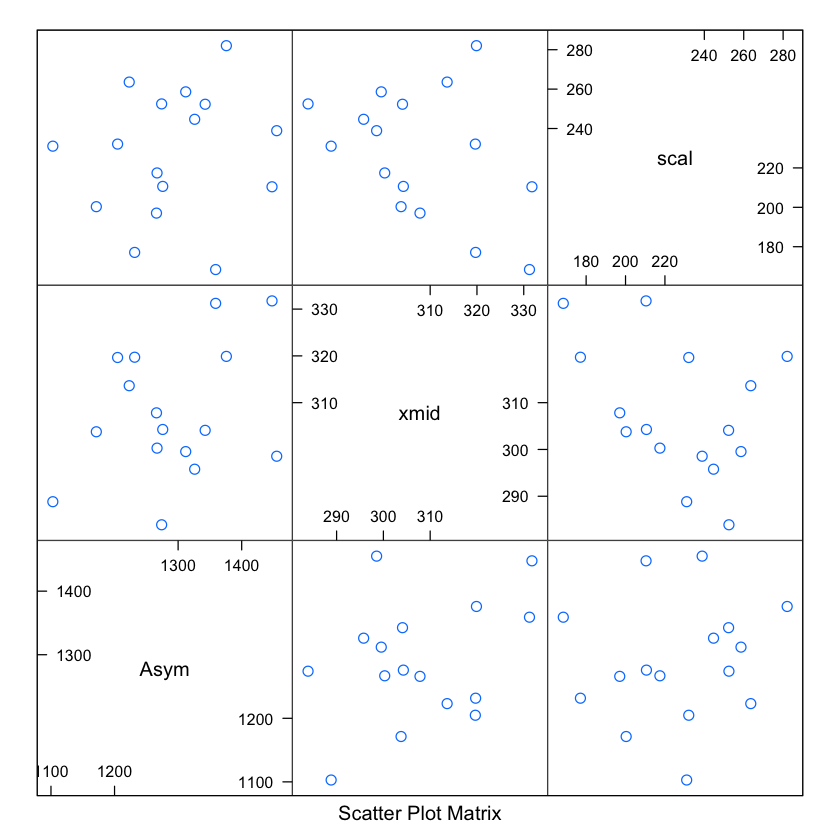

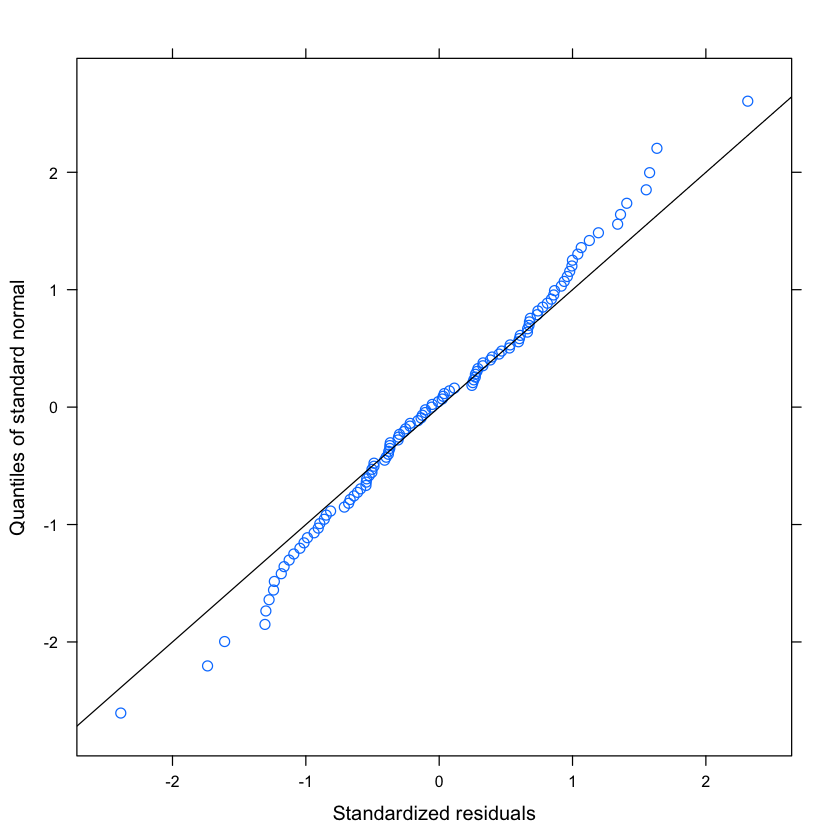

In [85]:
# Fit nonlinear model using nls (a single model is fit to all data, disregarding subjects)
res<-nls(ICV ~ SSlogis(Age,Asym,xmid,scal),data=brain)
print(res)
plot(res)
plot(res,SubjectID~resid(.),abline=0)

# Fit separate nonlinear models by group using nlsList
res2<-nlsList(ICV~SSlogis(Age,Asym,xmid,scal)|SubjectID,data=brain)
print(res2)
plot(res2)
plot(res2,SubjectID~resid(.),abline=0)
plot(intervals(res2),layout=c(3,1))
pairs(res2,id=0.1)

# Fit a nonlinear mixed model using nlme
res3<-nlme(res2)
print(res3)
plot(augPred(res3,level=0:1))
pairs(res3)
qqnorm(res3,abline=c(0,1))

# Fit a nonlinear mixed model with a diagonal covariance matrix
res3_1<-update(res3,random=pdDiag(Asym+xmid+scal~1))
print(res3_1)
anova(res3,res3_1)
plot(augPred(res3_1,level=0:1))
pairs(res3_1)
qqnorm(res3_1,abline=c(0,1))

# SSasymp model

The self-starting asymptotic growth model is

$y(x)=\phi_1+(\phi_2-\phi_1)exp[-exp(\phi_3)x]$,

where $\phi_1$ is the value of $y$ as $x \to \infty$, $\phi_2 = y(0)$ and $\phi_3$ is the log of the rate constant, such that $t_{0.5}=\frac {log(2)} {exp(\phi_3)}$.

Nonlinear regression model
  model: ICV ~ SSasymp(Age, Asym, R0, lrc)
   data: brain
    Asym       R0      lrc 
1354.864 -281.823   -5.968 
 residual sum-of-squares: 784074

Number of iterations to convergence: 4 
Achieved convergence tolerance: 1.55e-06
Call:
  Model: ICV ~ SSasymp(Age, Asym, R0, lrc) | SubjectID 
   Data: brain 

Coefficients:
          Asym          R0       lrc
S1507 1205.278 -1100.78937 -5.449399
S1468 1121.608    60.09340 -6.003760
S1502 1176.641  -521.63975 -5.680766
S1548 1272.013  -816.82477 -5.640966
S1460 1224.180  -613.32893 -5.784803
S1531 1320.107   -55.00447 -5.972725
S1525 1336.208   214.56297 -6.395090
S1508 1273.343 -1030.48240 -5.564385
S1553 1326.334   279.00947 -6.251610
S1528 1378.706   143.26050 -6.222500
S1555 1402.792   378.03431 -6.337126
S1543 1413.877   262.89682 -6.296690
S1484 1386.475 -1056.17368 -5.577205
S1472 1430.181  -190.74004 -6.117173
S1515 1532.129   331.34746 -6.260377
S1510 1482.950  -615.57011 -5.801693

Degrees of freedom: 1

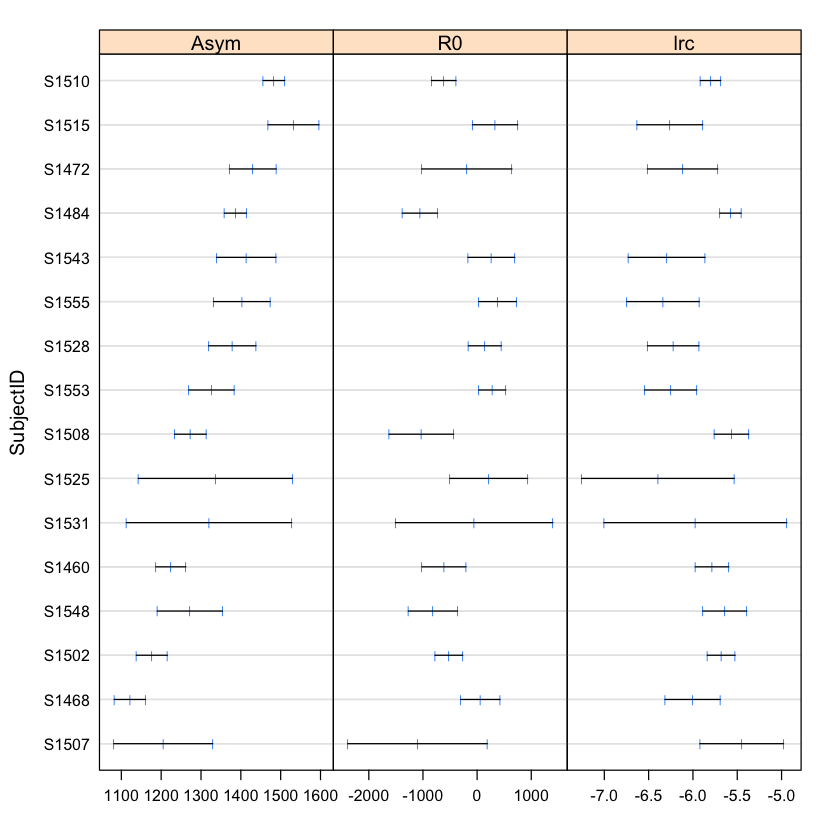

Nonlinear mixed-effects model fit by maximum likelihood
  Model: ICV ~ SSasymp(Age, Asym, R0, lrc) 
  Data: brain 
  Log-likelihood: -537.5741
  Fixed: list(Asym ~ 1, R0 ~ 1, lrc ~ 1) 
      Asym         R0        lrc 
1323.17370 -424.72490   -5.84424 

Random effects:
 Formula: list(Asym ~ 1, R0 ~ 1)
 Level: SubjectID
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev   Corr 
Asym     96.51697 Asym 
R0       92.71517 -0.81
Residual 23.85041      

Number of Observations: 109
Number of Groups: 16 


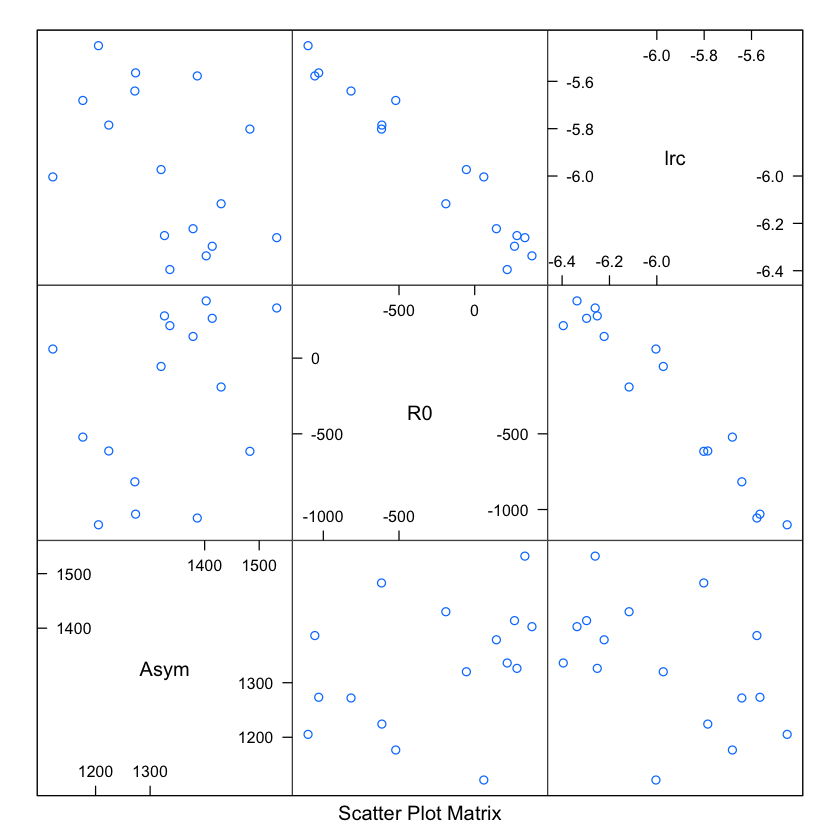

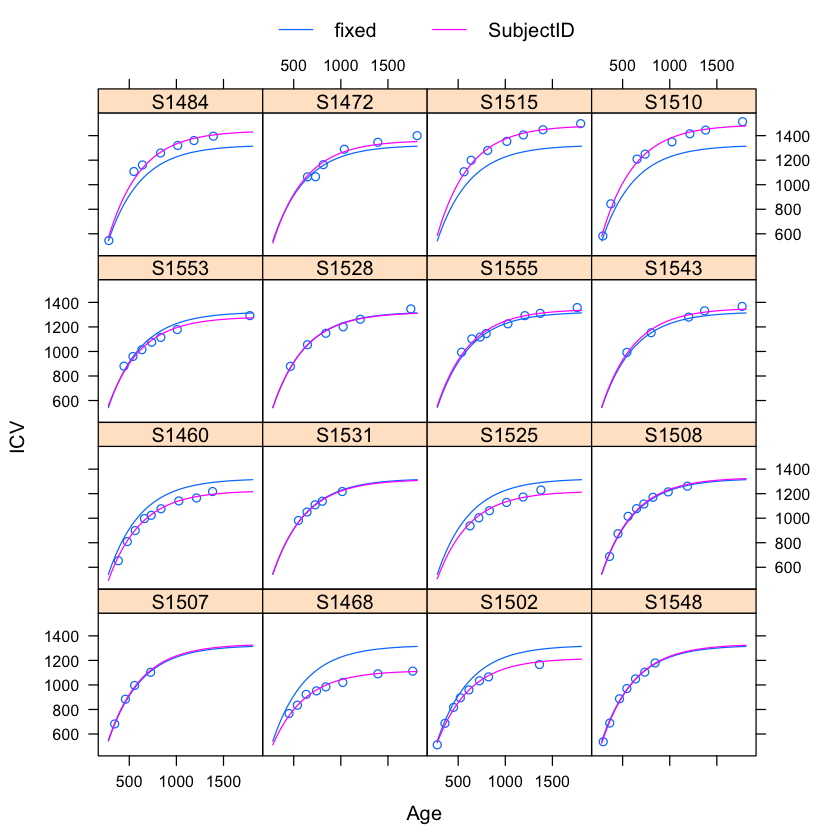

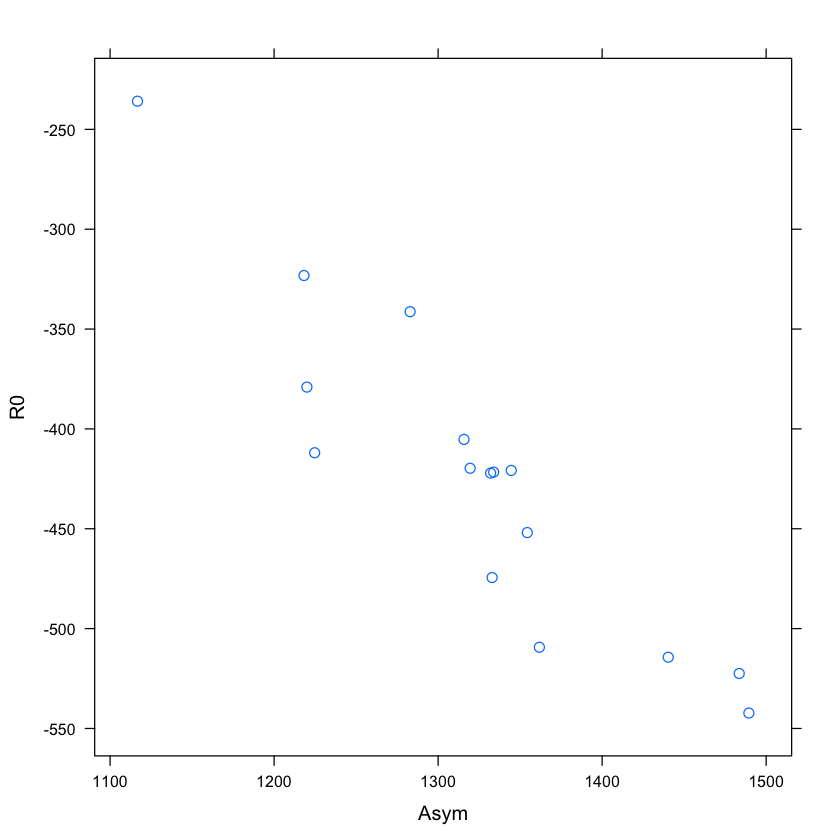

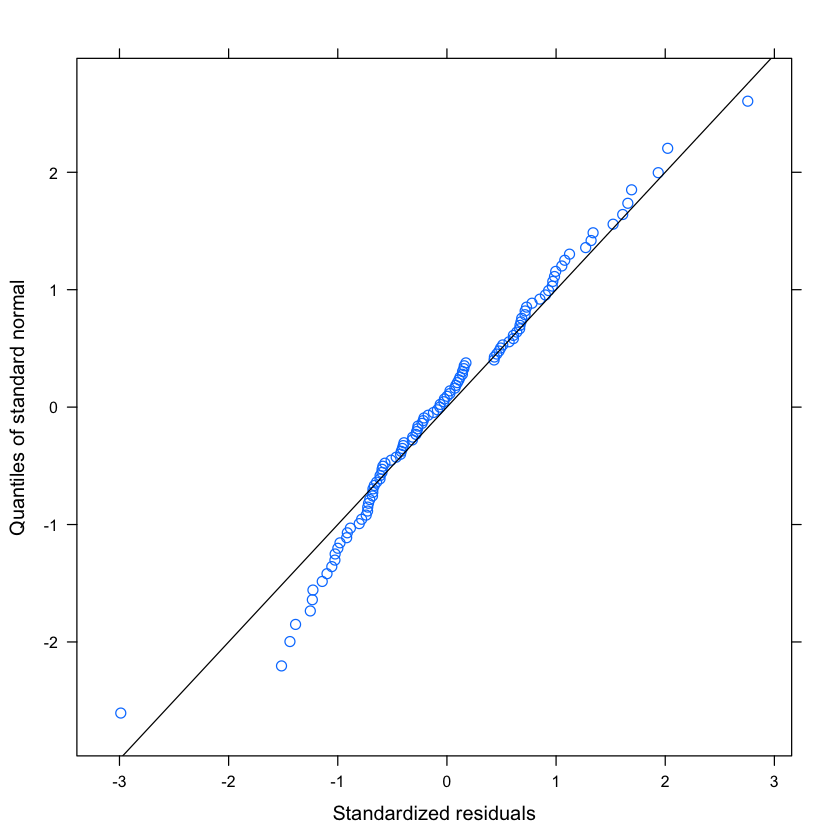

In [86]:
# Fit nonlinear model using nls and SSasymp
# (a single model is fit to all data, disregarding subjects)
resl<-nls(ICV ~ SSasymp(Age,Asym,R0,lrc),data=brain)
print(resl)

# Fit separate nonlinear models by group using nlsList
resl2<-nlsList(ICV~SSasymp(Age,Asym,R0,lrc)|SubjectID,data=brain)
print(resl2)
plot(intervals(resl2),layout=c(3,1))
pairs(resl2)

# Nonlinear mixed effects model
#resl3<-nlme(resl2,random=pdDiag(Asym+R0+lrc~1))
resl3<-nlme(resl2,random=Asym+R0~1)

print(resl3)
plot(augPred(resl3,level=0:1))
pairs(resl3)
qqnorm(resl3,abline=c(0,1))


## SSasympOrig

Nonlinear regression model
  model: ICV ~ SSasympOrig(Age, Asym, lrc)
   data: brain
    Asym      lrc 
1394.651   -6.176 
 residual sum-of-squares: 812477

Number of iterations to convergence: 3 
Achieved convergence tolerance: 2.677e-07
Call:
  Model: ICV ~ SSasympOrig(Age, Asym, lrc) | SubjectID 
   Data: brain 

Coefficients:
          Asym       lrc
S1507 1533.673 -6.316824
S1468 1117.265 -5.956425
S1502 1256.060 -6.097469
S1548 1672.233 -6.500230
S1460 1297.878 -6.190850
S1531 1327.949 -6.013100
S1525 1296.768 -6.191618
S1508 1389.438 -6.128865
S1553 1293.212 -6.004107
S1528 1360.027 -6.104790
S1555 1361.977 -6.028307
S1543 1385.953 -6.090693
S1484 1504.267 -6.167632
S1472 1442.973 -6.217330
S1515 1501.877 -6.035906
S1510 1562.885 -6.212155

Degrees of freedom: 109 total; 77 residual
Residual standard error: 33.57737


Nonlinear mixed-effects model fit by maximum likelihood
  Model: ICV ~ SSasympOrig(Age, Asym, lrc) 
  Data: brain 
  Log-likelihood: -569.1807
  Fixed: list(Asym ~ 1, lrc ~ 1) 
     Asym       lrc 
1371.8796   -6.1213 

Random effects:
 Formula: list(Asym ~ 1, lrc ~ 1)
 Level: SubjectID
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev       Corr  
Asym     105.37573229 Asym  
lrc        0.05861945 -0.648
Residual  33.96578691       

Number of Observations: 109
Number of Groups: 16 


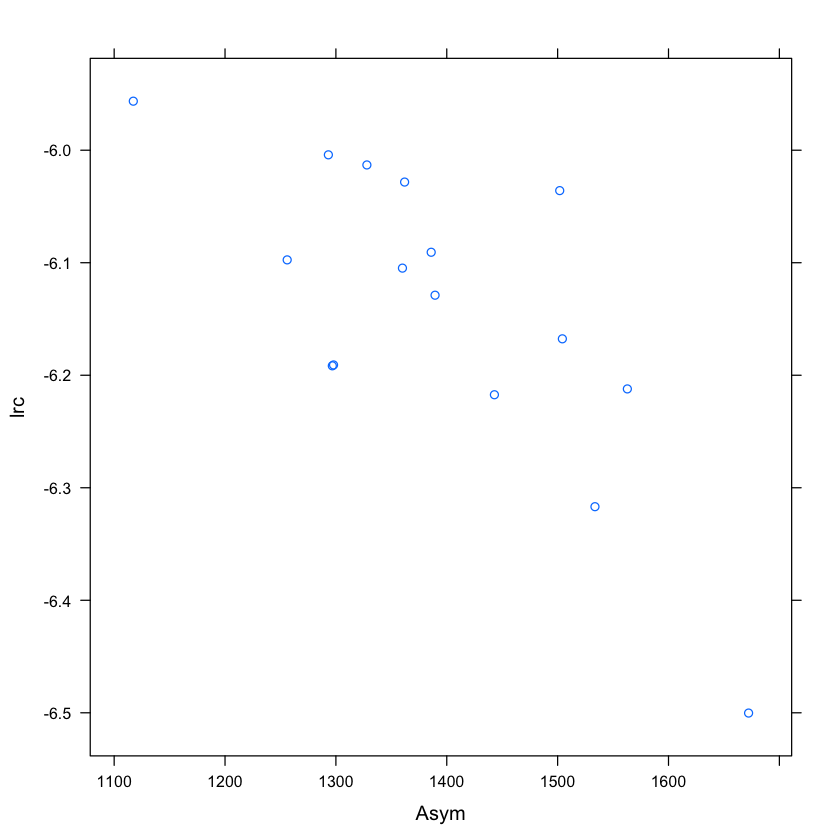

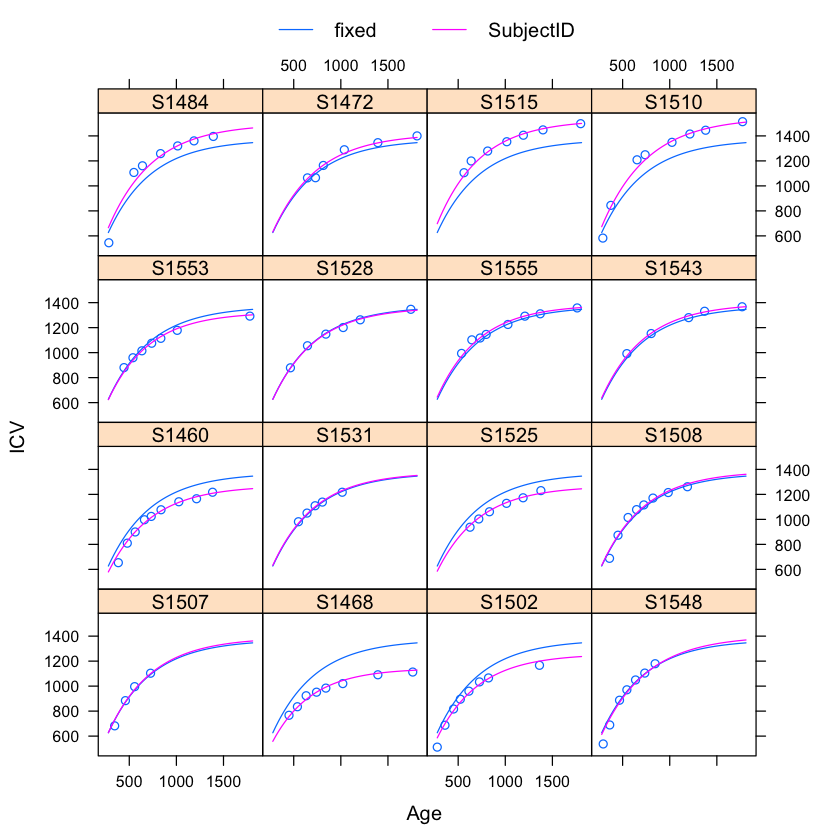

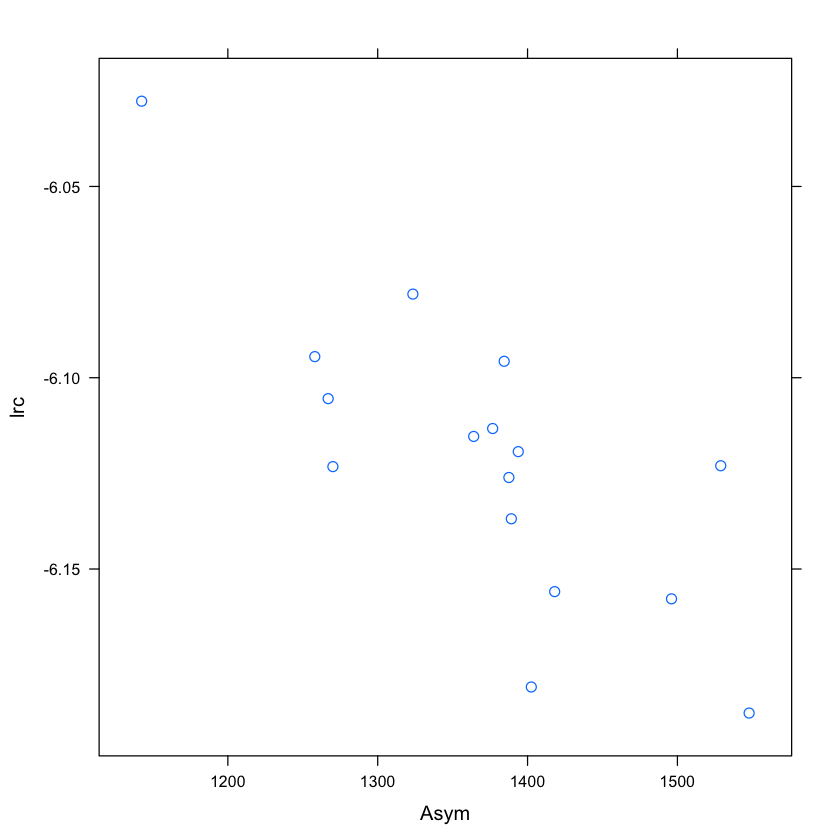

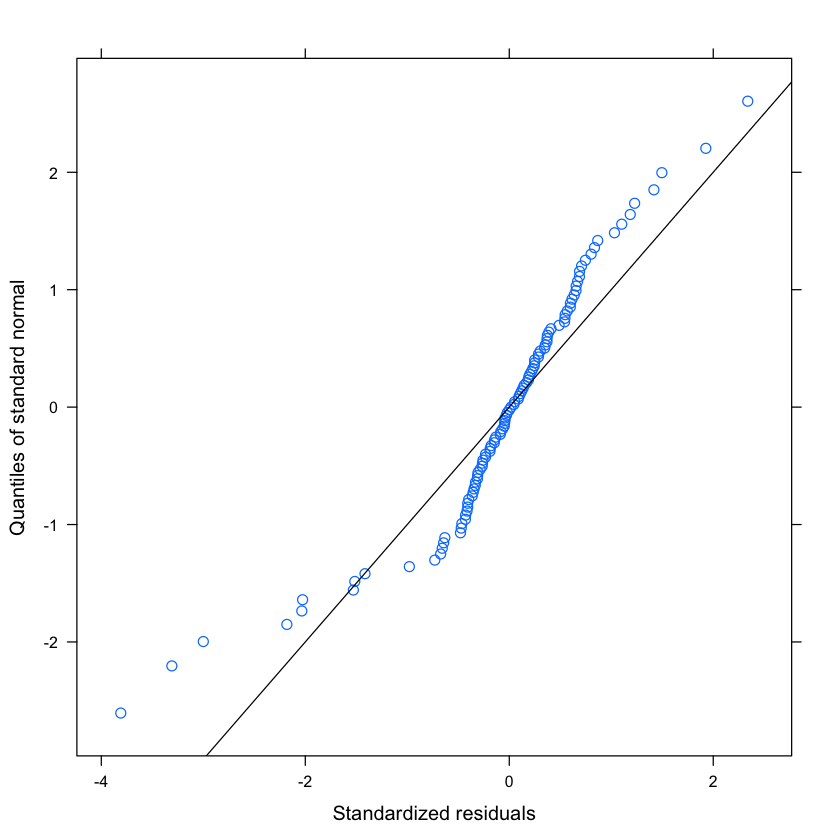

In [88]:
resl<-nls(ICV ~ SSasympOrig(Age,Asym,lrc),data=brain)
# Fit nonlinear model using nls and SSasympOrig
# (a single model is fit to all data, disregarding subjects)
resl<-nls(ICV ~ SSasympOrig(Age,Asym,lrc),data=brain)
print(resl)

# Fit separate nonlinear models by group using nlsList
resl2<-nlsList(ICV~SSasympOrig(Age,Asym,lrc)|SubjectID,data=brain)
print(resl2)
pairs(resl2)

# Nonlinear mixed-effects model
#resl3<-nlme(resl2,random=pdDiag(Asym+R0+lrc~1))
resl3<-nlme(resl2,random=Asym+lrc~1)
print(resl3)
plot(augPred(resl3,level=0:1))
pairs(resl3)
qqnorm(resl3,abline=c(0,1))


## SSmicmen

Nonlinear regression model
  model: ICV ~ SSmicmen(Age, Asym, lrc)
   data: brain
  Asym    lrc 
1786.1  483.8 
 residual sum-of-squares: 889228

Number of iterations to convergence: 4 
Achieved convergence tolerance: 1.177e-06
Call:
  Model: ICV ~ SSmicmen(Age, Asym, lrc) | SubjectID 
   Data: brain 

Coefficients:
          Asym       lrc
S1507 2352.071  793.8897
S1468 1323.272  302.3676
S1502 1668.315  492.1455
S1548 2646.727 1004.3005
S1460 1713.241  527.0587
S1531 1698.844  396.3014
S1525 1635.868  458.3625
S1508 1873.753  518.6504
S1553 1542.473  326.4401
S1528 1665.353  392.6852
S1555 1617.282  322.6852
S1543 1664.447  362.2310
S1484 2021.403  544.5227
S1472 1750.290  421.7724
S1515 1779.367  323.0013
S1510 2037.129  536.2768

Degrees of freedom: 109 total; 77 residual
Residual standard error: 42.12083


Nonlinear mixed-effects model fit by maximum likelihood
  Model: ICV ~ SSmicmen(Age, Asym, lrc) 
  Data: brain 
  Log-likelihood: -594.4492
  Fixed: list(Asym ~ 1, lrc ~ 1) 
     Asym       lrc 
1743.7642  444.0234 

Random effects:
 Formula: list(Asym ~ 1, lrc ~ 1)
 Level: SubjectID
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev    Corr 
Asym     187.92743 Asym 
lrc       93.93738 0.817
Residual  42.74550      

Number of Observations: 109
Number of Groups: 16 


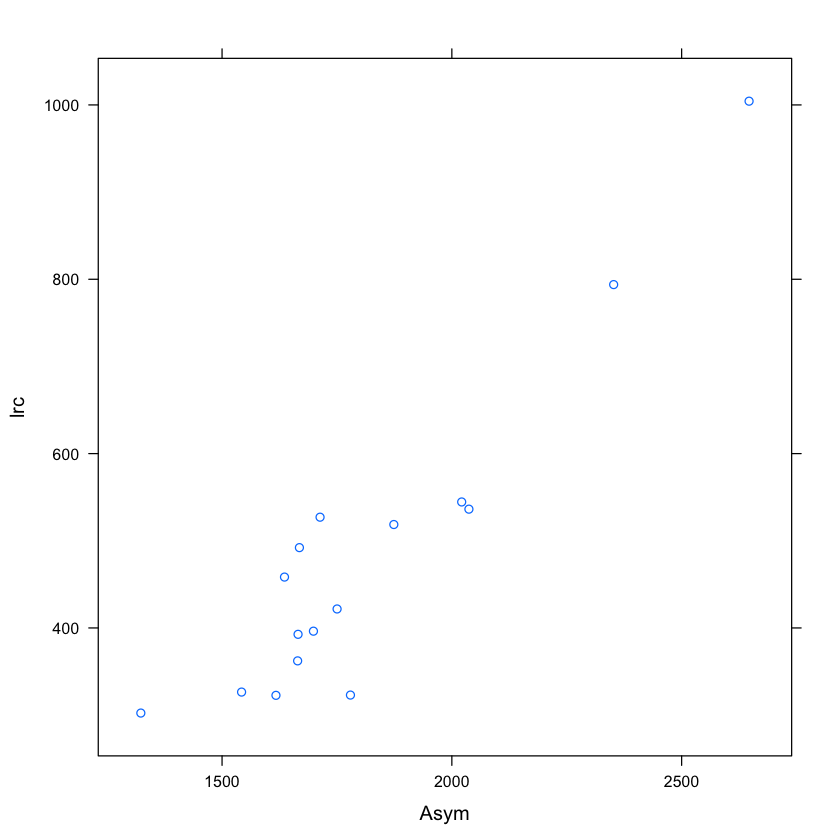

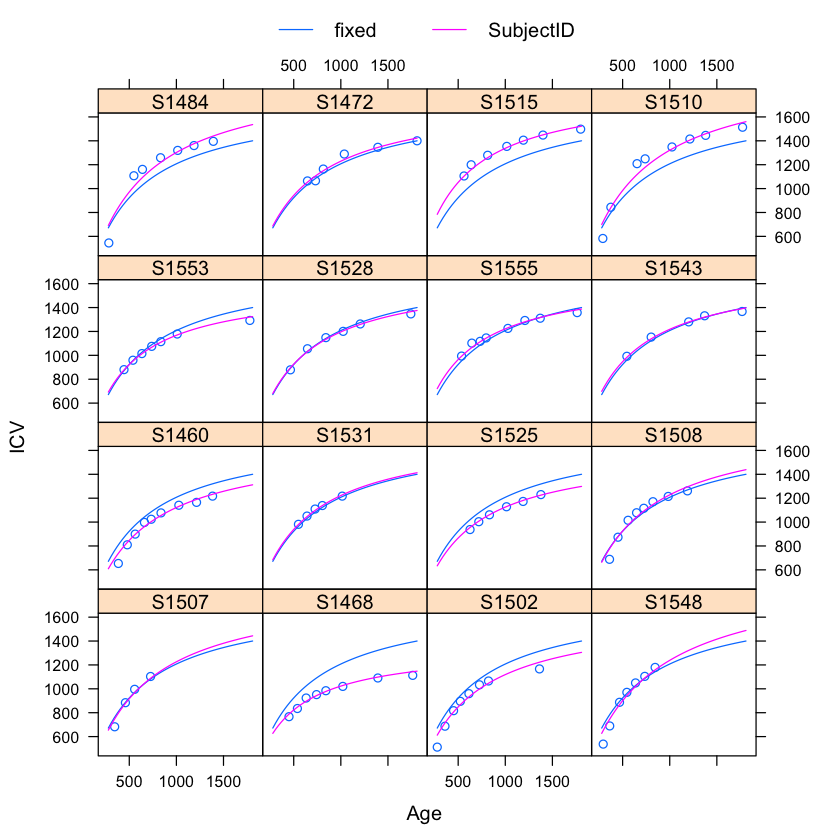

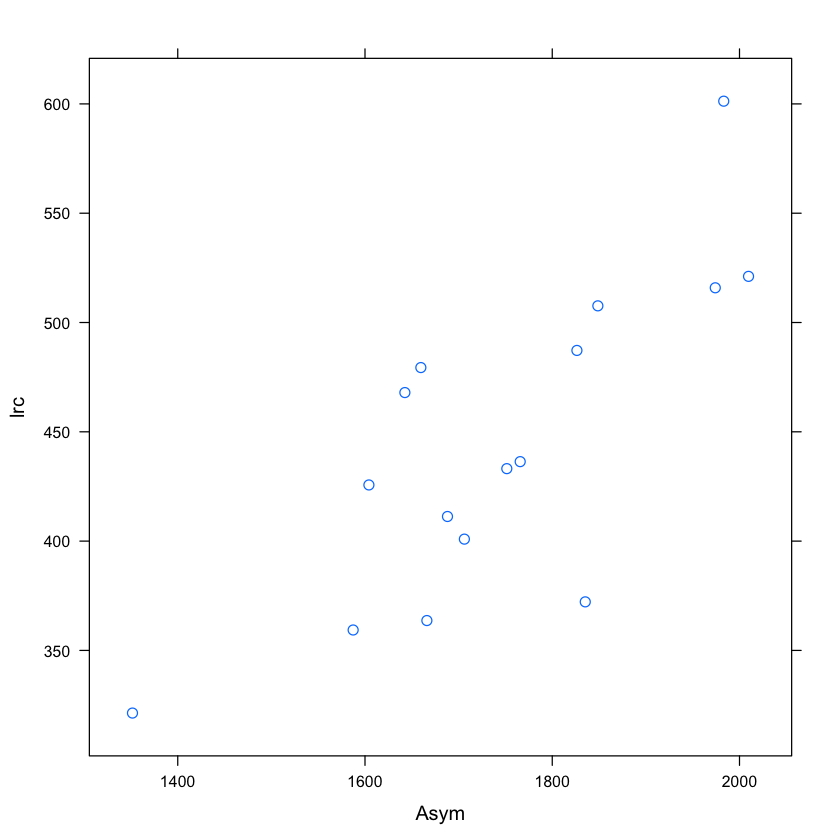

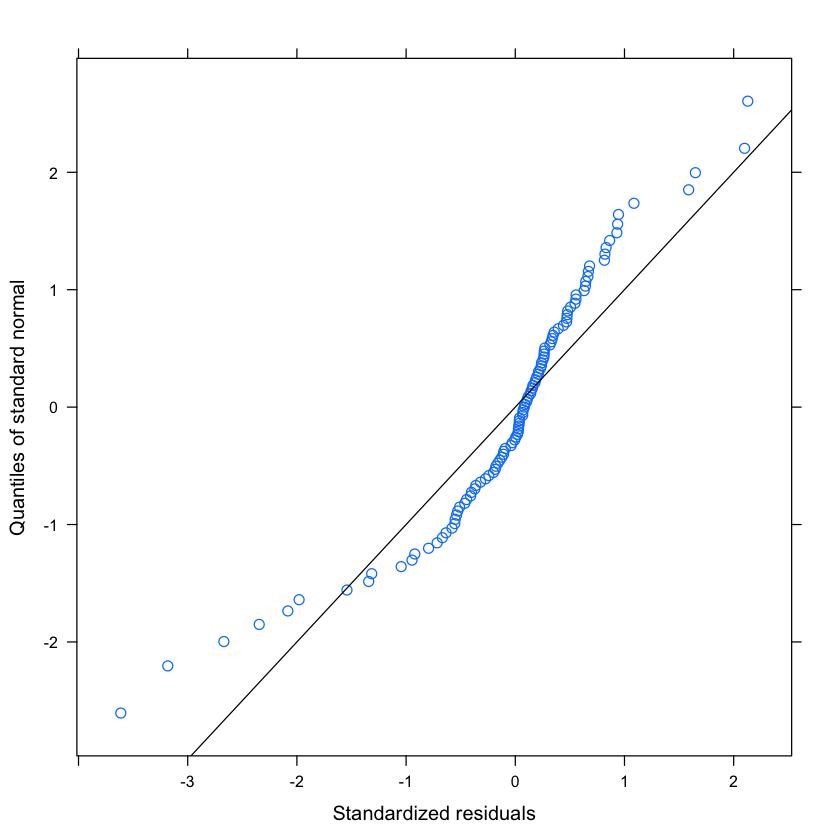

In [91]:
resl<-nls(ICV ~ SSmicmen(Age,Asym,lrc),data=brain)
# Fit nonlinear model using nls and SSasympOrig
# (a single model is fit to all data, disregarding subjects)
resl<-nls(ICV ~ SSmicmen(Age,Asym,lrc),data=brain)
print(resl)

# Fit separate nonlinear models by group using nlsList
resl2<-nlsList(ICV~SSmicmen(Age,Asym,lrc)|SubjectID,data=brain)
print(resl2)
pairs(resl2)

# Nonlinear mixed-effects model
#resl3<-nlme(resl2,random=pdDiag(Asym+R0+lrc~1))
resl3<-nlme(resl2,random=Asym+lrc~1)
print(resl3)
plot(augPred(resl3,level=0:1))
pairs(resl3)
qqnorm(resl3,abline=c(0,1))

## SSgompertz

Nonlinear regression model
  model: ICV ~ SSgompertz(Age, A, B, C)
   data: brain
        A         B         C 
1334.5848    2.0776    0.9967 
 residual sum-of-squares: 808412

Number of iterations to convergence: 4 
Achieved convergence tolerance: 7.08e-06
Call:
  Model: ICV ~ SSgompertz(Age, A, B, C) | SubjectID 
   Data: brain 

Coefficients:
             A         B         C
S1507 1175.247 3.7987247 0.9943806
S1468 1116.439 1.3024759 0.9971810
S1502 1159.823 2.6759197 0.9955965
S1548 1221.469 3.6165179 0.9949355
S1460 1209.338 2.5932042 0.9961850
S1531 1303.924 1.5006129 0.9969778
S1525 1316.102 1.1840009 0.9979798
S1508 1259.355 3.2074483 0.9953009
S1553 1316.610 1.0957343 0.9977289
S1528 1367.322 1.2757925 0.9976587
S1555 1393.082 0.9654886 0.9979648
S1543 1403.552 1.1104247 0.9978634
S1484 1370.431 3.6814454 0.9950682
S1472 1421.360 1.6177459 0.9974553
S1515 1524.530 1.0282432 0.9978419
S1510 1466.698 2.6159955 0.9961402

Degrees of freedom: 109 total; 61 residual
Residual sta

Nonlinear mixed-effects model fit by maximum likelihood
  Model: ICV ~ SSgompertz(Age, A, B, C) 
  Data: brain 
  Log-likelihood: -543.4224
  Fixed: list(A ~ 1, B ~ 1, C ~ 1) 
           A            B            C 
1328.7698937    1.8758992    0.9968792 

Random effects:
 Formula: list(A ~ 1, B ~ 1, C ~ 1)
 Level: SubjectID
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev       Corr         
A        1.088941e+02 A      B     
B        8.575953e-01 -0.313       
C        1.017339e-03  0.408 -0.992
Residual 2.065777e+01              

Number of Observations: 109
Number of Groups: 16 


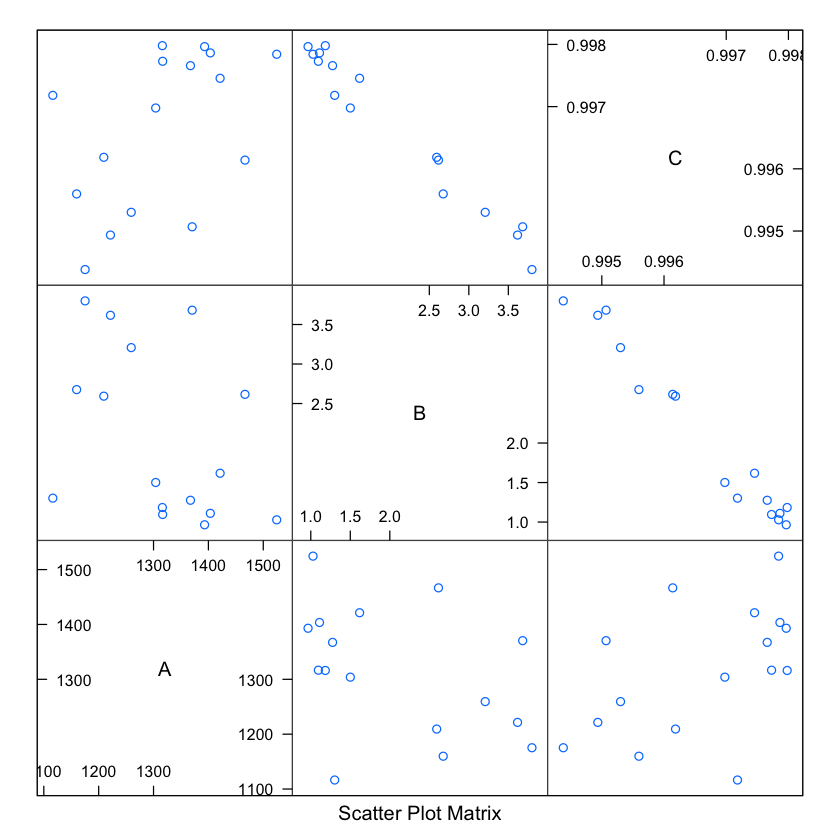

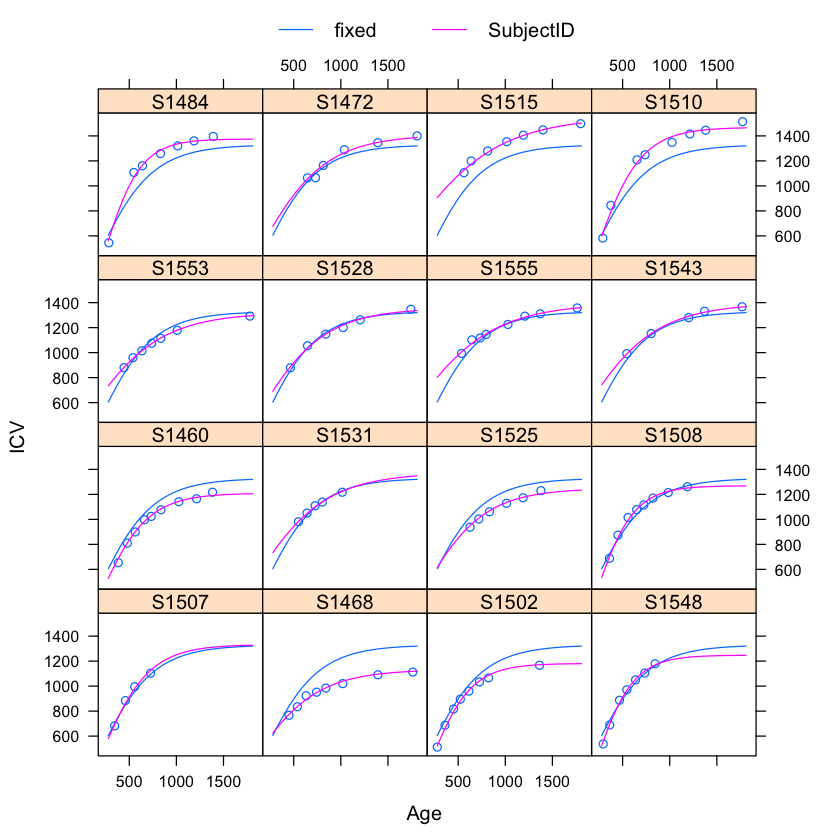

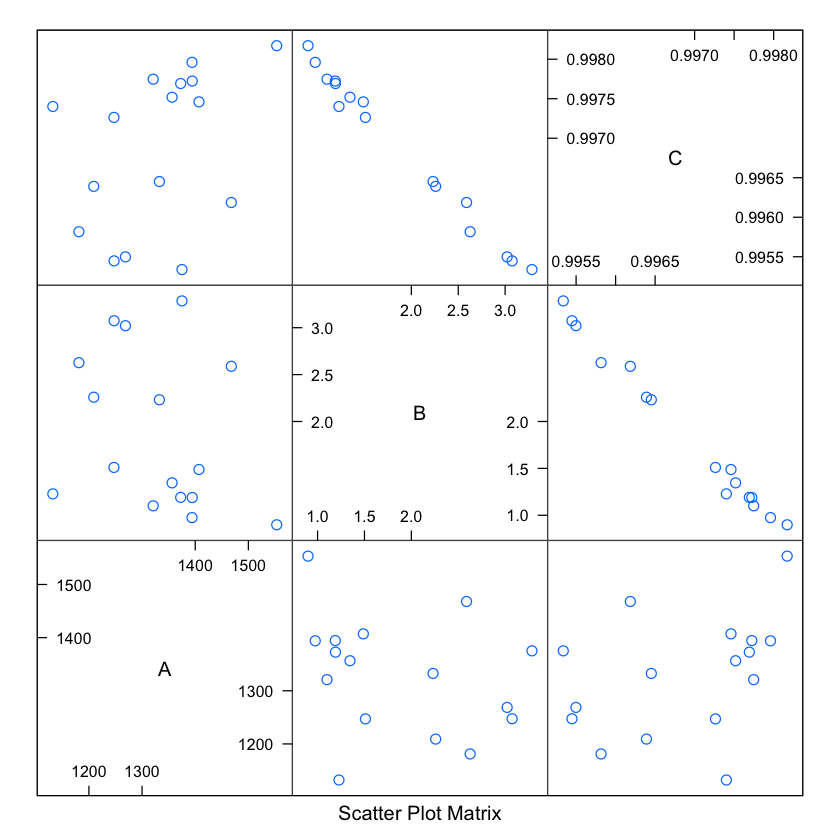

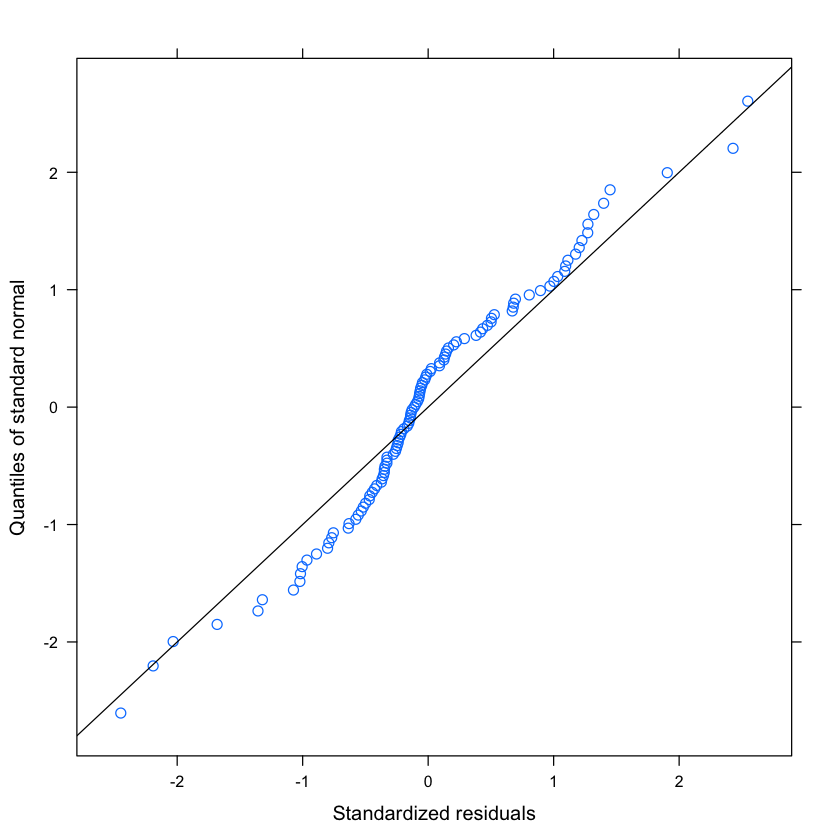

In [97]:
resl<-nls(ICV ~ SSgompertz(Age,A,B,C),data=brain)
# Fit nonlinear model using nls and SSasympOrig
# (a single model is fit to all data, disregarding subjects)
resl<-nls(ICV ~ SSgompertz(Age,A,B,C),data=brain)
print(resl)

# Fit separate nonlinear models by group using nlsList
resl2<-nlsList(ICV~SSgompertz(Age,A,B,C)|SubjectID,data=brain)
print(resl2)
pairs(resl2)

# Nonlinear mixed-effects model
#resl3<-nlme(resl2,random=pdDiag(Asym+R0+lrc~1))
resl3<-nlme(resl2,random=A+B+C~1)
print(resl3)
plot(augPred(resl3,level=0:1))
pairs(resl3)
qqnorm(resl3,abline=c(0,1))

In [94]:
help(SSgompertz)